# Convolución Animada
***
## Integrantes:
- Felipe Véliz ; felipe.veliz@alumnos.uach.cl

- Leonardo Santos ; leonardo.santos@alumnos.uach.cl

## Institución:
Universidad Austral de Chile


## Profesor:

Victor Poblete

## Asignatura:

ACUS099

## Objetivo:

El objetivo de este trabajo es mostrar paso a paso el proceso de convolución en tiempo discreto, de forma animada, usando lenguaje de programación python.


## Librerias a usar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
from IPython.display import YouTubeVideo
import time

## Definiendo funciones

Las funciones que usaremos son las siguientes

- **stem:** Grafica simple con eje *x* e *y*
- **anim:** Animación de la gráfica 

In [2]:
def stem(n,x):
    
    fig,ax = plt.subplots(figsize=(16,5))
    ax.stem(n,x)
    ax.set_xlabel('Posición')
    ax.set_ylabel('Amplitud')    
    markerline, stemlines, baseline = plt.stem(n, x, markerfmt='o', label='x')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')    
    ax.legend()
    plt.show()
    
def anim(x,y):
    
    plt.clf()
    ax = plt.gca()
    ax.stem(x,y)
    ax.set_xlabel('Posicion', fontsize=16)
    ax.set_ylabel('Amplitud', fontsize=16)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.4)    
   

# Definiendo variables

Las variables que usaremos serán las siguientes

- **x:** Lista de amplitudes de la señal *x*
- **x_n:** Lista de las posiciones de las amplitudes de la señal *x*


- **h:** Lista de amplitudes de la señal *h*
- **h_n:** Lista de las posiciones de las amplitudes de la señal *h*


- **minposx_n:** El minimo valor de *x_n*
- **maxposh_n:** El maximo valor de *h_n*


- **n:** Eje de posiciones para el gráfico, construido con un arreglo numpy en base al minimo de *x_n* y al maximo de *h_n*


- **c:** Cantidad de ceros a los costados
- **C:** Cantidad de ceros entre las señales

In [3]:
x=[1,3,5,7,9]
x_n=[-13,-12,-11,-10,-9]

h=[1,1,1,1,1]
h_n=[9,10,11,12,13]

minposx_n=min(x_n)
maxposh_n=max(h_n)

c=2

n1=np.arange(minposx_n-c,maxposh_n+c+1)
n=n1.tolist()

C=abs((len(x)+c)+(len(h)+c)-len(n))

# Graficando ambas señales en una figura

En primera instancia, siempre es mejor ver como y con que elementos vamos a trabajar, por lo que graficar ambas señales es primordial para poder llegar a una convolucion animada.

Si queremos graficar las señales, debemos agregar elementos a una lista *r* que tenga ambas señales y sea del mismo largo que *n*. Para lograr esto, debemos hacer **padding**, poner ceros dentro de *r* hasta que ambas listas tengan la misma cantidad de elementos. Luego llamamos a la funcion *stem* para graficar.

In [4]:
K=x+h
L=x_n+h_n

print("Lista con Amplitudes: ",K)
print("Lista con Posiciones de señales: ",L)
print("Lista de Posiciones: ",n)

Lista con Amplitudes:  [1, 3, 5, 7, 9, 1, 1, 1, 1, 1]
Lista con Posiciones de señales:  [-13, -12, -11, -10, -9, 9, 10, 11, 12, 13]
Lista de Posiciones:  [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


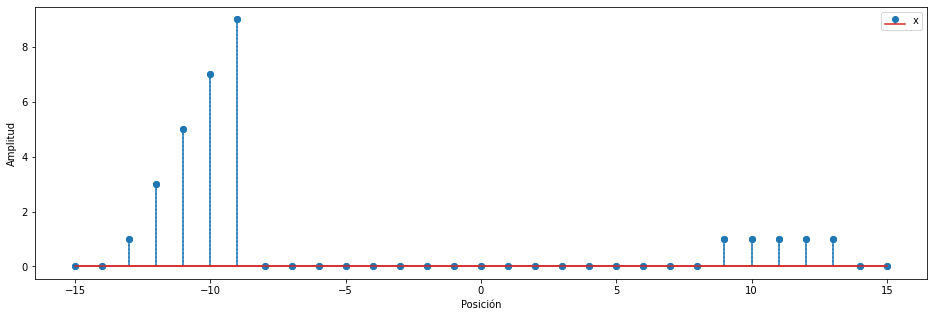

In [5]:
x=[1,3,5,7,9]
x_n=[-13,-12,-11,-10,-9]
h=[1,1,1,1,1]
h_n=[9,10,11,12,13]

y_1=0
u_1=0
r=[]

for i in n:
    for l in L:
        #print(i,l)
        if i==l:
            r.append(K[y_1])
            y_1=y_1+1
            u_1=1
            
    if u_1==0:
        r.append(0)
    elif u_1==1:
        u_1=0
        
stem(n,r)

# Comienza el movimiento

En esta parte del codigo, propusimos sumar 1 a las posiciones de la señal que se moverá, ya que anteriormente verificamos las posiciones para asignar su correspondiente amplitud al momento de graficar. Luego, es guardada y sobrescrita en la variable L. Este proceso se conoce como **shifting**

Usando la funcion *anim* veremos el desplazamiento de la señal *x* hasta topar la señal *h*.

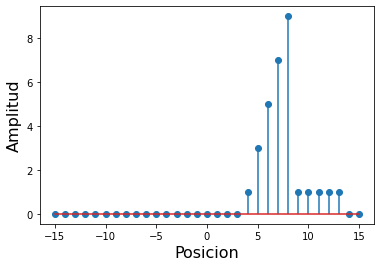

<Figure size 432x288 with 0 Axes>

In [6]:
#animacion

x_n=[-13,-12,-11,-10,-9]
h_n=[9,10,11,12,13]
    
for i in range(C):
    for a in range(1):  
        for R in range (len(x_n)):
                 x_n[R]=x_n[R]+1

        L1=x_n+h_n
        y_1=0
        u_1=0
        r=[]
        
        for i in n:
                for l in L1:
                    if i==l:
                        r.append(K[y_1])
                        y_1=y_1+1
                        u_1=1

                if u_1==0:
                    r.append(0)

                elif u_1==1:
                    u_1=0
    
    if len(n)!=len(r):
        plt.clf()
        break
        
    anim(n,r)
    plt.clf()

## Superposición de Amplitudes

Al llegar el momento de superposicion de amplitudes, tenemos un problema de formas nuevamente, ya que el codigo agrega un cero a la izquierda de la señal por cada movimiento a la derecha. Para solucionar esto, decidimos cambiar el largo de n cada vez que se agregue un cero, agregando la posición que comparten las señales.

A su vez, ampliaremos ligeramente el *n* para poder ver el desplazamiento en su totalidad. 

In [7]:
c=len(x)+2

n1=np.arange(minposx_n-c,maxposh_n+c+1)
n=n1.tolist()

C=abs((len(x)+c)+(len(h)+c)-len(n))

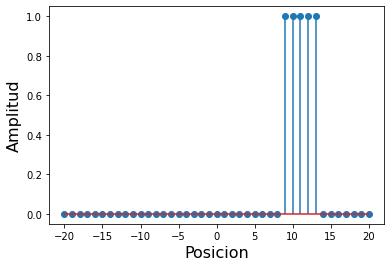

<Figure size 432x288 with 0 Axes>

In [8]:
x_n=[-13,-12,-11,-10,-9]
h_n=[9,10,11,12,13]
for A in range(C+c+len(h)+len(x)):
    
    K=x+h
    n2=[]
    cont3=0
    cont4=0
    n2.extend(n)
    
    for a in range(1):
        for R in range (len(x_n)):
            x_n[R]=x_n[R]+1

        L1=x_n+h_n
        if min(x_n)>max(h_n):
            K=h+x
        y_1=0
        u_1=0
        r_1=[]

        for i in n:
                for l in L1:
                    if i==l:
                        u_1=1
                        
                        if y_1<len(K):
                            r_1.append(K[y_1])
                            y_1=y_1+1
                            
                if u_1==0:
                    r_1.append(0)

                elif u_1==1:
                    u_1=0
                    
    if max(x_n)<=max(h_n):
        for d in x_n:
            for e in h_n:
                if d==e:
                    if max(x_n)<=max(h_n):
                        n2.insert(C+len(x)+c+cont3,e)
                        cont3=cont3+1

    elif max(x_n)>max(h_n) and min(x_n)<=max(h_n):
        for di in x_n:
            bot4=0
            for ei in h_n:
                if di==ei:
                    n2.insert(n2[min(h_n)-1],ei)
                    bot4=1

                elif di!=ei and ei==max(h_n) and bot4==0 :
                    n2.remove(di)
                    n2.insert(n2[min(h_n)+cont4],di)
                    cont4=cont4+1              
    anim(n2,r_1)
    plt.clf()

## Convolución

En la siguiente celda sucede la convolucion. Para esto necesitamos crear un arreglo de ceros con numpy que tenga una dimension igual al largo de la suma de las señales. Creamos un nuevo arreglo con la lista h, que tenga la misma cantidad de ceros a la izquierda y a la derecha que el largo de la señal x. 

A medida que las señales se superponen, se multiplican y se suman. A medida que sucede esto el resultado de esta operación es una nueva señal *Y[n]*. Como ejemplo, podemos ver *(d)* en la Fig.1

Para poder hacer esto, nos apoyamos del codigo [2]


![Foto1](pag27.png)

$$\text{Fig.1 Convolución [1] (Pag.27)}$$

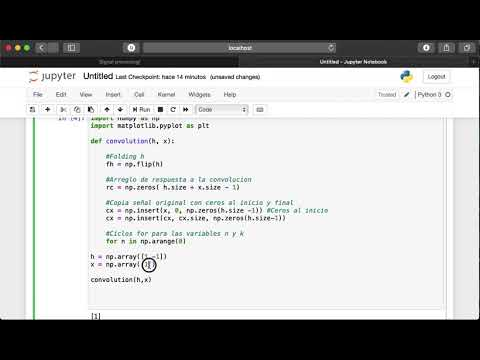

In [9]:
YouTubeVideo('37CzQ8YCmlc') 

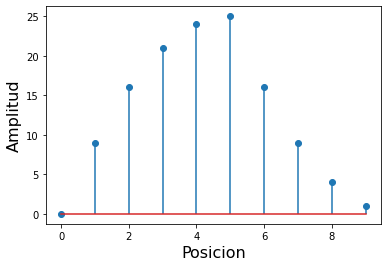

<Figure size 432x288 with 0 Axes>

In [10]:
#Animacion
x=[1,3,5,7,9]
h=[1,1,1,1,1]

Y=np.zeros(len(x)+len(h))
n3=np.arange(0,len(Y))

h3=np.insert(h,0,np.zeros(len(x)))
h3=np.insert(h3,len(h3),np.zeros(len(x)))
h3=h3.tolist()

for AA in range(1):
    for j in np.arange(0,len(Y)):
        for k in np.arange(0,len(x)):
            YY=k+j
            Y[j]=x[k]*h3[YY]+Y[j]
            
        anim(n3,Y)
    plt.clf()

## Conclusión

Para conlcuir, a lo largo de este proceso se siguió la planficiación inicial, enfocada en los conocimientos fundamentales de procesamiento de señales como *padding, shifting, definiciones* y su empleo en python como tambien librerias vistas en clases, apoyadas con recursos bibliograficos lo es *Discrete time, signal processing-Alan V. Oppenheim*. Lograr visualizar el medio para obtener el resultado deseado de la convulucion fue el principal desafio en cuanto a el planteamiento en codigo. Además, mencionar que este fue un proyecto el cual implicó que el principal avance surgiese en base a prueba y error, creando un ritmo de avance autodidacta muy exquisito y reconfortante a lo largo del proceso, el cual otórgo un conocimiento bastante robusto, ademas de un gran abanico de codigos para emplear a futuro. Realmente este fue un desafío bastante completo y dirigido hacia un gran aprendizaje que se logró con satisfaccion.